
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: October 19, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Alex (Joseph) McGraw
2. Alexandre Nicolaï

# Question 1 - MLP Regressor (15 pts) 
In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)


In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.


   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

# Answer 1

1) (5pts) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.
(a) hidden_layer_sizes = (5,)
(b) hidden_layer_sizes = (15,)
(c) hidden_layer_sizes = (50,)
activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# 5 hidden nodes
MLP_reg_5 = MLPRegressor(hidden_layer_sizes = (5,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_5_pred_train = MLP_reg_5.predict(X_train_scaled)
MLP_5_pred_test = MLP_reg_5.predict(X_test_scaled)

MLP_5_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_5_pred_train))
MLP_5_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_5_pred_test))

print('Train RMSE for 5 nodes is {}\nTest RMSE is {}'.format(MLP_5_RMSE_train, MLP_5_RMSE_test))

Train RMSE for 5 nodes is 3.360128954016189
Test RMSE is 4.79841304289056


In [5]:
# 15 hidden nodes
MLP_reg_15 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_15_pred_train = MLP_reg_15.predict(X_train_scaled)
MLP_15_pred_test = MLP_reg_15.predict(X_test_scaled)

MLP_15_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_15_pred_train))
MLP_15_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_15_pred_test))

print('Train RMSE for 15 nodes is {}\nTest RMSE is {}'.format(MLP_15_RMSE_train, MLP_15_RMSE_test))

Train RMSE for 15 nodes is 3.0199130137125887
Test RMSE is 4.5517066936252295


In [6]:
# 50 hidden nodes
MLP_reg_50 = MLPRegressor(hidden_layer_sizes = (50,), activation = 'tanh', solver = 'sgd', learning_rate = 'constant',\
                        random_state = 42, batch_size = 20, learning_rate_init= 0.005).fit(X_train_scaled, y_train)

MLP_50_pred_train = MLP_reg_50.predict(X_train_scaled)
MLP_50_pred_test = MLP_reg_50.predict(X_test_scaled)

MLP_50_RMSE_train = np.sqrt(mean_squared_error(y_train, MLP_50_pred_train))
MLP_50_RMSE_test = np.sqrt(mean_squared_error(y_test, MLP_50_pred_test))

print('Train RMSE for 50 nodes is {}\nTest RMSE is {}'.format(MLP_50_RMSE_train, MLP_50_RMSE_test))

Train RMSE for 50 nodes is 2.940964154111819
Test RMSE is 4.7726684612395305


# Answer
The model with 15 hidden nodes performed the best. The model with 5 hidden nodes performed almost as well as the 15, but the train and test RMSE for the 15 hidden nodes is slightly lower than the 5 hidden nodes. The 50 hidden nodes, while performing better on the train RMSE, performed nearly the same as the 5 hidden nodes test RMSE, which is higher than the 15 nodes test RMSE. This could be due to overfitting in the 50 hidden nodes model.

# 2)
 (5pts) MLPRegressor has a built-in attribute loss_curve_ which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as my_model you can call it as my_model.loss_curve_ (example). Plot three curves using the following three conditions (a, b, c) in one figure, where X-axis is epoch number and Y-axis is squared root of loss_curve_:
 
 (a) hidden_layer_sizes = (5,)
(b) hidden_layer_sizes = (15,)
(c) hidden_layer_sizes = (50,)


Text(0, 0.5, 'Squared loss curve')

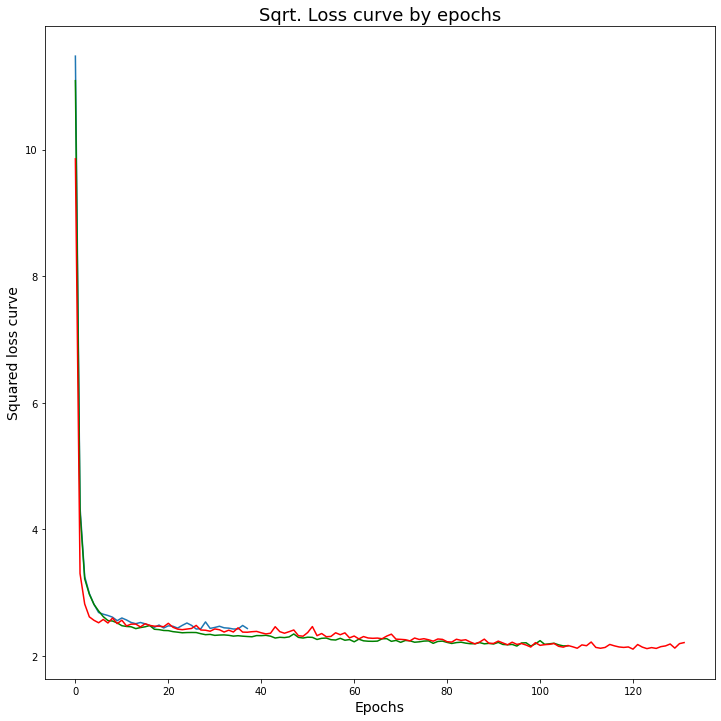

In [7]:
lc_5 = MLP_reg_5.loss_curve_
lc_15 = MLP_reg_15.loss_curve_
lc_50 = MLP_reg_50.loss_curve_

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.plot(range(len(lc_5)), np.sqrt(lc_5))
ax.plot(range(len(lc_15)), np.sqrt(lc_15), color='green')
ax.plot(range(len(lc_50)), np.sqrt(lc_50), color='red')
ax.set_title('Sqrt. Loss curve by epochs', fontsize=18)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Squared loss curve', fontsize=14)

3) (5pts) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size.
activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)

Plot three different figures for the three batch size, where X-axis is epoch number and Y-axis is squared root of loss_curve_:

(a) batch_size = 1

(b) batch_size = 20

(c) batch_size = 2000

Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Text(0, 0.5, 'Squared loss curve')

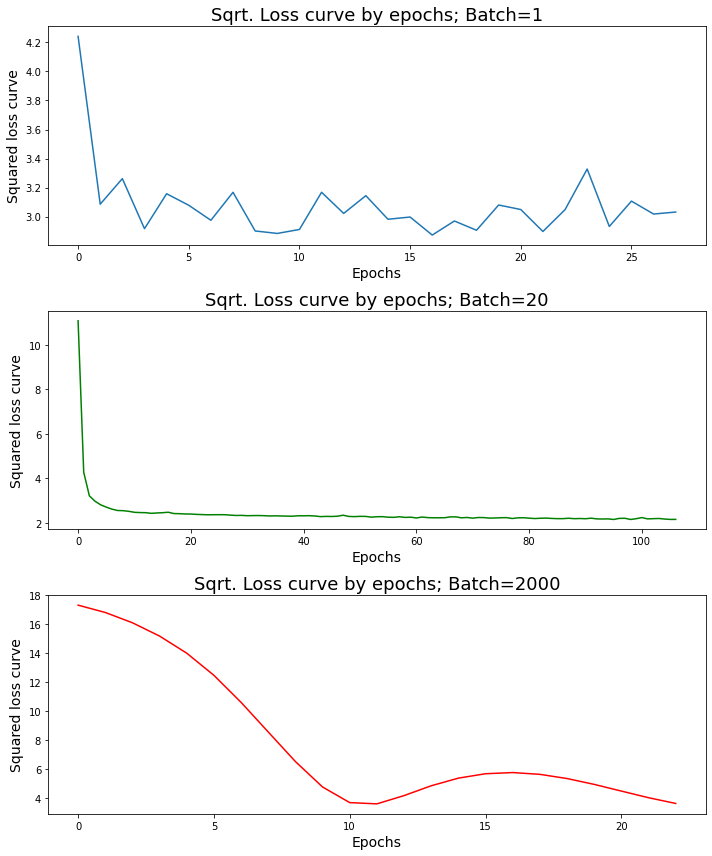

In [8]:
new_reg1 = MLPRegressor(activation='tanh', solver='sgd', learning_rate='constant', random_state=42,\
                      learning_rate_init=0.005, hidden_layer_sizes=(15,), batch_size=1).fit(X_train_scaled, y_train)
reg1_loss = new_reg1.loss_curve_

new_reg20 = MLPRegressor(activation='tanh', solver='sgd', learning_rate='constant', random_state=42,\
                      learning_rate_init=0.005, hidden_layer_sizes=(15,), batch_size=20).fit(X_train_scaled, y_train)
reg20_loss = new_reg20.loss_curve_

new_reg2000 = MLPRegressor(activation='tanh', solver='sgd', learning_rate='constant', random_state=42,\
                      learning_rate_init=0.005, hidden_layer_sizes=(15,), batch_size=2000).fit(X_train_scaled, y_train)
reg2000_loss = new_reg2000.loss_curve_

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), tight_layout=True)
ax1.plot(range(len(reg1_loss)), np.sqrt(reg1_loss))
ax2.plot(range(len(reg20_loss)), np.sqrt(reg20_loss), color='green')
ax3.plot(range(len(reg2000_loss)), np.sqrt(reg2000_loss), color='red')

ax1.set_title('Sqrt. Loss curve by epochs; Batch=1', fontsize=18)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Squared loss curve', fontsize=14)

ax2.set_title('Sqrt. Loss curve by epochs; Batch=20', fontsize=18)
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Squared loss curve', fontsize=14)

ax3.set_title('Sqrt. Loss curve by epochs; Batch=2000', fontsize=18)
ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('Squared loss curve', fontsize=14)

The batch of 1 has a much more sporadic decrease in loss when compared to the batch of 20 because the batch of 1 is changing the model or every individual observation, while the batch of 20 takes groupings of 20 and then changes the model. This cuts down on the noise fed into the model, which gives it that much smoother curve. 

The batch of 2000 is interesting because it doesn't decrease at nearly the rate as the other two models, and has that increase in loss after the 12th epoch. This could be because the batch is much larger than the number of observations in the training data. 

# Question 2: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (**4 pts**)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (**4 pts**)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (**4 pts**)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (**3 pts**)

# Answer 2

1. Using Tanh:
Train loss = 0.145
Test loss = 0.197

Using Tanh, the blue space is an upward sloping diagonal section, while the upper left and bottom right corners are orange space predictions. 
 
Using linear:
Train loss = 0.496
Test loss = 0.494

Using linear, it generates a very dull gradient from blue predictions, to gray, to orange predictions going from left to right. 

The Tanh activation had a much more defined prediction zones, while the linear activation had much less defined/less certain prediction areas. This is because the Tanh function reaches -1 and 1 much quicker than a linear function, thus it will give a more definitive answer in the less extreme areas.

2. Using 4 neurons:
train loss = 0.015
test loss = 0.02

Using 8 neurons:
train loss = 0.009
test loss = 0.023

The decision boundaries were roughly the same between the two models. This is because the increase in neurons from 4 to 8 didn't actually bring in any new information. It only resulted in overfitting for the 8 node model.

3. 100 Epochs, learning rate 10:
train loss = .8
test loss = .84

100 epochs, learning rate .1:
train loss = .003
test loss = .004

100 epochs, learning rate .01:
train loss = .069
test loss = .088

100 epochs, learning rate .001:
train loss = .305
test loss = .313

1000 epochs, learning rate 10:
train loss = 0.68
test loss = 0.64

1000 epochs, learning rate .1:
train loss = 0.000
test loss = 0.003

1000 epochs, learning rate .01:
train loss = 0.005
test loss = 0.012

1000, epochs, learning rate .001:
train loss = 0.033
test loss = 0.039

As the number of epochs increased, the train and test loss both decreased. The main discrepancy area is the size of the learning rate. When the learning rate is 10, the loss is quite substantial. When it is .01 or .001, it isn't quite large/strong enough. The learning rate of .1 is ideal to have the lowest loss on train and test. 

# Question 3 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [9]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
X = df.drop(['class_type','animal_name'], axis = 1)

class_df = pd.read_csv("class.csv")

def binary_class(item):
    if item in [1,2,3,4,5]:
        return 1
    else:
        return 0
    
df['classType_binary'] = df['class_type'].map(binary_class)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,classType_binary
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


# Answer 3

In [10]:
# 1. Correlation Matrix
X_with_typeBinary = df.drop(['class_type', 'animal_name'], axis=1)

X_corr = X_with_typeBinary.corr()
X_corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,classType_binary
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,0.191681
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,0.231403
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,-0.340420
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,0.384958
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,-0.104718
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.022463
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.051022
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,0.575085
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,1.000000
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,0.207666


In [11]:
# 5 most positive variables
pos_corr = X_corr['classType_binary'].sort_values().iloc[-6:-1]
pos_corr

catsize     0.356976
milk        0.384958
toothed     0.575085
tail        0.731762
backbone    1.000000
Name: classType_binary, dtype: float64

In [12]:
# 2. 5 most negative features

neg_corr = X_corr['classType_binary'].sort_values().iloc[:5]
neg_corr

legs       -0.432856
eggs       -0.340420
venomous   -0.246611
airborne   -0.104718
aquatic     0.022463
Name: classType_binary, dtype: float64

In [13]:
# ETA 

y_1 = y

y_1[y_1<6] = 1

y_1[y_1>5]= 0

y_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [14]:
# ETA 

def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta



In [15]:
# ETA each feature

col = X.columns

correls = []

for x in col:
    print(x,correlation_ratio(y_1, df[x].values))
    correl = x,correlation_ratio(y_1, df[x].values)
    correls.append(correl)
    
    
class_type_ETA = pd.DataFrame(data = correls, columns = ['feature','ETA'])

class_type_ETA

hair 0.036741459288101366
feathers 0.053547523427041485
eggs 0.11588592735213117
milk 0.1481927710843374
airborne 0.010965941688833254
aquatic 0.0005045824322932764
predator 0.0026032702237521544
toothed 0.3307228915662651
backbone 1.0000000000000002
breathes 0.04312527889335115
venomous 0.060816743677217795
fins 0.04388984509466436
legs 0.18736441615760613
tail 0.5354755775237704
domestic 0.01034967375328821
catsize 0.12743184326887558


,feature,ETA
0,hair,0.036741
1,feathers,0.053548
2,eggs,0.115886
3,milk,0.148193
4,airborne,0.010966
5,aquatic,0.000505
6,predator,0.002603
7,toothed,0.330723
8,backbone,1.000000
9,breathes,0.043125


In [16]:
3. # Recursive Feature Elimination

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = df
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(max_iter=1000)
# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=5, step=1)
rfe = rfe.fit(X,y)
# summarize the selection of the attributes
#print(rfe.ranking_)
#print(X.columns)
d = {'features':X.columns, 'ranking':rfe.ranking_}
ranking_df = pd.DataFrame(data=d)
rfe_top_5 = ranking_df.sort_values('ranking').iloc[:5]
rfe_top_5


,features,ranking
1,feathers,1
3,milk,1
7,toothed,1
8,backbone,1
13,tail,1


In [17]:
# 4. Create a train_test split of 80:20(train:test) with random state = 50

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#X_train
#y_train

#X_test
#y_test

X_train_most_correlated = X_train[pos_corr.index]

X_test_most_correlated = X_test[pos_corr.index]

X_train_least_correlated = X_train[neg_corr.index]

X_test_least_correlated = X_test[neg_corr.index]

X_train_RFE = X_train[rfe_top_5['features']]

X_test_RFE = X_test[rfe_top_5['features']]

In [18]:
# 5. Preprocessing data - Z-Score

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)



In [19]:
# 6. Train a MLP Regressor with train data and report the 𝑅2  score on the test set for each of the following,

#a) Model trained with top 5 most positvely correlated features from part 1

from sklearn.metrics import r2_score

X_train = X_scaler.fit_transform(X_train_most_correlated)
X_test = X_scaler.transform(X_test_most_correlated)

regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)

regr_y_predict = regr.predict(X_test)

#print(regr.score(X_test, y_test))
print(r2_score(regr_y_predict,y_test))





0.986423355272409


In [20]:
#b) Model trained with top 5 most negatively correlated features from part 2


X_train = X_scaler.fit_transform(X_train_least_correlated)
X_test = X_scaler.transform(X_test_least_correlated)

regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)

regr_y_predict = regr.predict(X_test)

print(r2_score(regr_y_predict,y_test))


0.754427932153038


In [21]:
#c) Model trained with five features selected by RFE from part 3

X_train = X_scaler.fit_transform(X_train_RFE)
X_test = X_scaler.transform(X_test_RFE)

regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)

regr_y_predict = regr.predict(X_test)

print(r2_score(regr_y_predict, y_test))

0.9986347135585708


In [23]:
#d) Finally train a MLP Regressor on the entire training data with the entire orignal features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)

regr_y_predict = regr.predict(X_test)

print(r2_score(regr_y_predict, y_test))





0.9566033754322979


# 7. Explain your results based on your understanding of feature selection and the  𝑅2  score.

The 5 positive have a R^2 score of 0.98, 5 negative has 0.75, and RFE has 0.99. For the 5 positive case, this makes sense because while individually they are highly correlated to the target variable, they do not take into account the interaction affects. The 5 negative makes sense because they are also highly correlated to the target variable in an inverse manner, but don't take into account interaction affects. The RFE being the best performing model also makes sense because it tests many different models, and can account for interaction affects when testing with new variables.  


# Question 4 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


### Question 4.1 (5 points)
Print the number of NaN values in each column. Next, if the value of `yr_renovated` is equal to 0, set it equal to the corresponding value of `yr_built`.

In [2]:

print(df.isna().sum())

comparison_column = np.where(df["yr_renovated"] == 0, df['yr_built'], df["yr_renovated"])

df["yr_renovated"] = comparison_column

df

bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,NaN,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009,2009,98103.0,360000.0
21609,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014,2014,98146.0,400000.0
21610,2.0,0.75,1020.0,NaN,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009,2009,98144.0,402101.0
21611,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004,2004,NaN,400000.0


### Question 4.2 (6 points)

Create a copy of `df` named `df_dm` and create a new column in `df_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use [pandas.cut()](https://stackoverflow.com/a/31740881) and modify its paramter list as below:
- `bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]`
- `labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']`
- `include_lowest=True`

Next, perform one-hot encoding using this new column.

In [3]:
df_dm = df.copy(deep=True)

df_dm['binned_yr_built']= pd.cut(df_dm['yr_built'],bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],include_lowest=True)


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [5]:
df_dm['binned_yr_built'] = le.fit_transform(df_dm['binned_yr_built'])


In [6]:
df_dm = df_dm.dropna()

In [7]:
X = df_dm[['binned_yr_built','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode']].values

X

array([[2.0000e+00, 3.0000e+00, 2.5700e+03, ..., 2.1700e+03, 4.0000e+02,
        9.8125e+04],
       [4.0000e+00, 3.0000e+00, 1.6800e+03, ..., 1.6800e+03, 0.0000e+00,
        9.8074e+04],
       [4.0000e+00, 3.0000e+00, 1.7150e+03, ..., 1.7150e+03, 0.0000e+00,
        9.8003e+04],
       ...,
       [5.0000e+00, 3.0000e+00, 1.4900e+03, ..., 1.4900e+03, 0.0000e+00,
        9.8144e+04],
       [5.0000e+00, 3.0000e+00, 1.3100e+03, ..., 1.1800e+03, 1.3000e+02,
        9.8116e+04],
       [5.0000e+00, 4.0000e+00, 2.3100e+03, ..., 2.3100e+03, 0.0000e+00,
        9.8146e+04]])

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer

label_encoder_x_1 = LabelEncoder()
X[: , 2] = label_encoder_x_1.fit_transform(X[:,2])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [0]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')

In [9]:
y = df_dm['price']

X

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.1700e+03, 4.0000e+02,
        9.8125e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.6800e+03, 0.0000e+00,
        9.8074e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.7150e+03, 0.0000e+00,
        9.8003e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.4900e+03, 0.0000e+00,
        9.8144e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.1800e+03, 1.3000e+02,
        9.8116e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.3100e+03, 0.0000e+00,
        9.8146e+04]])

In [10]:
X = X[:,1:]
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.1700e+03, 4.0000e+02,
        9.8125e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.6800e+03, 0.0000e+00,
        9.8074e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.7150e+03, 0.0000e+00,
        9.8003e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.4900e+03, 0.0000e+00,
        9.8144e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.1800e+03, 1.3000e+02,
        9.8116e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.3100e+03, 0.0000e+00,
        9.8146e+04]])

## Question 4.3 (4 points)
Create a copy of `df` named `temp_df`. Drop all rows in `temp_df` that contain any null value and run a linear regression model using a train-test split with `test_size=0.3` and `random_state=42`.

In [81]:
from sklearn.linear_model import LinearRegression

temp_df = df.copy(deep=True)

temp_df = temp_df.dropna(axis=0)

X = temp_df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode']]
y = temp_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

print(reg.score(X_test,y_test))

print(reg.coef_)




0.6684046745373201
[-3.17565935e+04  5.96818870e+04  1.11863142e+02 -1.04702796e-01
  2.39146400e+04  7.20216612e+05  2.95468314e+04  1.56631715e+04
  1.23232092e+05  5.77252894e+01  5.41378526e+01 -4.11495316e+03
 -3.77475275e+01]


In [82]:
temp_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995,1995,98003.0,257500.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003,2003,98038.0,323000.0
10,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,1965,1965,98007.0,662500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,4.0,3.00,3990.0,7838.0,2.0,0.0,0.0,3.0,9.0,3990.0,0.0,2003,2003,98053.0,810000.0
21603,3.0,2.50,2270.0,5536.0,2.0,0.0,0.0,3.0,8.0,2270.0,0.0,2003,2003,98065.0,507250.0
21604,3.0,2.00,1490.0,1126.0,3.0,0.0,0.0,3.0,8.0,1490.0,0.0,2014,2014,98144.0,429000.0
21607,3.0,2.50,1310.0,1294.0,2.0,0.0,0.0,3.0,8.0,1180.0,130.0,2008,2008,98116.0,475000.0


## Question 4.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a MLPRegressor. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [20]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_mean = imp_mean.fit_transform(X_train)

X_test_mean = imp_mean.fit_transform(X_test)


In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr = MLPRegressor(random_state=42, max_iter=1000).fit(X_train_mean, y_train)

print(regr.score(X_test_mean, y_test))



0.5240890286081737


In [33]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

X_train_median = imp_median.fit_transform(X_train)

X_test_median = imp_median.fit_transform(X_test)

In [40]:
regr = MLPRegressor(random_state=42, max_iter=1000).fit(X_train_median, y_train)

print(regr.score(X_test_median, y_test))

0.5248048436186932


In [41]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train_most_frequent = imp_most_frequent.fit_transform(X_train)

X_test_most_frequent = imp_most_frequent.fit_transform(X_test)


In [42]:
regr = MLPRegressor(random_state=42, max_iter=1000).fit(X_train_most_frequent, y_train)

print(regr.score(X_test_most_frequent, y_test))

0.5202684113223721


In [43]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

X_train_Knn_2 = imputer.fit_transform(X_train)

X_test_Knn_2 = imputer.fit_transform(X_test)


In [44]:
regr = MLPRegressor(random_state=42, max_iter=1000).fit(X_train_Knn_2, y_train)

print(regr.score(X_test_Knn_2, y_test))

0.5236955109689001


In [45]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

X_train_Knn_5 = imputer.fit_transform(X_train)

X_test_Knn_5 = imputer.fit_transform(X_test)


In [62]:
regr = MLPRegressor(random_state=42, max_iter=1000).fit(X_train_Knn_5, y_train)

print(regr.score(X_test_Knn_5, y_test))

0.5304850621766337


In [47]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

X_train_Knn_10 = imputer.fit_transform(X_train)

X_test_Knn_10 = imputer.fit_transform(X_test)

In [72]:
regr = MLPRegressor(random_state=42, max_iter=1000).fit(X_train_Knn_10, y_train)

print(regr.score(X_test_Knn_10, y_test))

0.5282541672793966


In [73]:
print('Mean_imputer:          ',regr.score(X_test_mean, y_test))
print('Median_imputer:        ',regr.score(X_test_median, y_test))
print('Most_frequent_imputer: ',regr.score(X_test_most_frequent, y_test))
print('Knn_2_imputer:         ',regr.score(X_test_Knn_2, y_test))
print('Knn_5_imputer:         ',regr.score(X_test_Knn_5, y_test))
print('Knn_10_imputer:        ',regr.score(X_test_Knn_10, y_test))

Mean_imputer:           0.5233083354168848
Median_imputer:         0.5185009393311357
Most_frequent_imputer:  0.5090086073937758
Knn_2_imputer:          0.5239546015524574
Knn_5_imputer:          0.5278470760866744
Knn_10_imputer:         0.5282541672793966


Using Knn_imputer we get the best result. 

 SimpleImputer and KnnImputer gives a $R^2$ score very similar when using the MLP Regressor.

In [74]:
reg = LinearRegression().fit(X_train_mean, y_train)

print(reg.score(X_test_mean, y_test))

0.6287720987806913


In [76]:
reg = LinearRegression().fit(X_train_most_frequent, y_train)

print(reg.score(X_test_most_frequent, y_test))

0.6203186894635794


In [77]:
reg = LinearRegression().fit(X_train_Knn_2, y_train)

print(reg.score(X_test_Knn_2, y_test))

0.6275027492420746


In [78]:
reg = LinearRegression().fit(X_train_Knn_5, y_train)

print(reg.score(X_test_Knn_5, y_test))

0.6329360901447854


In [79]:
reg = LinearRegression().fit(X_train_Knn_10, y_train)

print(reg.score(X_test_Knn_10, y_test))

0.6353889450916668


In [80]:
print('Mean_imputer:          ',reg.score(X_test_mean, y_test))
print('Median_imputer:        ',reg.score(X_test_median, y_test))
print('Most_frequent_imputer: ',reg.score(X_test_most_frequent, y_test))
print('Knn_2_imputer:         ',reg.score(X_test_Knn_2, y_test))
print('Knn_5_imputer:         ',reg.score(X_test_Knn_5, y_test))
print('Knn_10_imputer:        ',reg.score(X_test_Knn_10, y_test))

Mean_imputer:           0.6276690259792355
Median_imputer:         0.6201341926259204
Most_frequent_imputer:  0.6174653255381897
Knn_2_imputer:          0.627403085683961
Knn_5_imputer:          0.6328755016244092
Knn_10_imputer:         0.6353889450916668


Using a linear regressor, the conclusion is identical to using an MLP Regressor. 

## Question 4.5 (2 points)
In Questions 4.3 and 4.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

We had around 21 thousands lines before dropping NaN values. After droping those rows, we were left with around 6 thousands values. 

It means that around 15 thousands rows contained NaN values. 
Filling the missing values for 15 thousands rows using a Simple Imputer or a Knn Imputer is biasing the dataset. 
The mean, median, most frequent value or the one resulting from the mean of the n neighbours is not representative of the value it would be on 21 thousands rows. 

Therefore, here it is better to drop those rows than trying to fill them. 

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (first 6 topics/lectures only, i.e. up to "gradient descent"). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 1, write 1A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

We selected the note 6A.

This note has been very useful when studying for the quiz. Indeed,the information is clear and well structured. 
Each step of the Gradient descent is very well described. Moreover, the comparison between Gradient descent and Stochastic Gradient Descent has been 
very well presented to understand the charasterics of each and their respective pros and cons. 

Both teams did a great job on this subject but we felt that the one from section B was getting to much into details and could lead to confusion since the subject 
has not been covered during the summer. However, we think it was a great idea to present and sum up the articles from the link they shared on the note. 

This not could be further improved by merging both sections notes. 
Indeed, the presentation of section A and the concise way to present the concepts is great but could be complemented with the articles summaries from section B to go further in detail on the subject.
